# Breast Cancer Diagnostic Winscoin

###### Importing libraries

In [447]:
import numpy as np 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
style.use('ggplot')

###### Reading csv file

In [448]:
df=pd.read_csv('data.csv')
diagnose=np.array(df[["diagnosis"]]=='M')

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [564]:
diagnose=np.where(diagnose==True, 1, 0)
df[["diagnosis"]]=diagnose
data=df[['radius_mean', 
'texture_mean',
'perimeter_mean',
'area_mean',             
'smoothness_mean',           
'compactness_mean',          
'concavity_mean',             
'concave points_mean',        
'symmetry_mean',              
'fractal_dimension_mean',
'radius_worst']]
neg=list(df[['radius_mean', 'concavity_mean', 'diagnosis']].groupby('diagnosis'))[0][1]
pos=list(df[['radius_mean', 'concavity_mean', 'diagnosis']].groupby('diagnosis'))[1][1]
target=df[['diagnosis']]
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54


###### Data Visualisation

Text(0.5, 1.0, 'Breast Cancer')

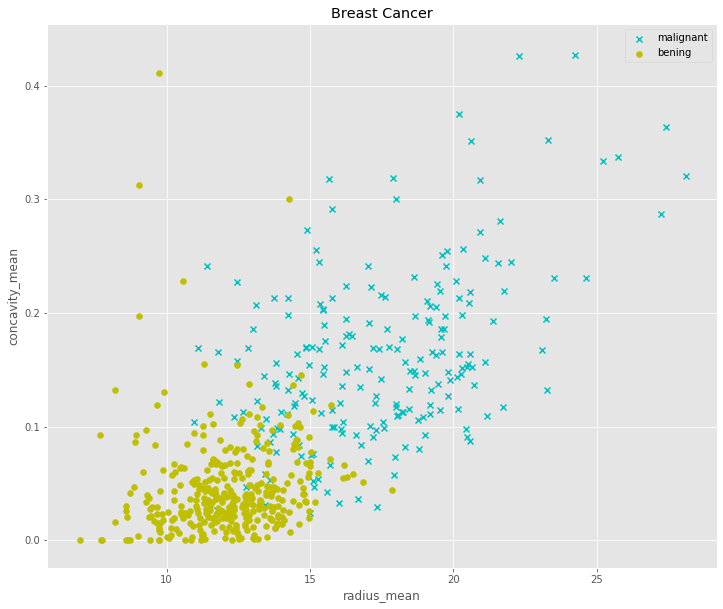

In [565]:
plt.figure(figsize=(12, 10))
plt.scatter(pos[['radius_mean']], pos['concavity_mean'], c='c', marker='x', label='malignant')
plt.scatter(neg[['radius_mean']], neg['concavity_mean'], c='y', marker='o', label='bening')
plt.legend()
plt.xlabel("radius_mean")
plt.ylabel("concavity_mean")
plt.title("Breast Cancer")

##### Splitting Train and Test sets and Scaling of Data

In [566]:
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.2, random_state=42)
np.array(X_train)[0]
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##### function to calculate euclidean distance

In [567]:
def euclidean_distance(p, q):
    return sqrt(np.sum(np.square(np.subtract(p, q))))

dataset = pd.DataFrame([[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]])


dataset.iloc[0:i, [0, 1]]
for i in range(len(dataset)):
    print(euclidean_distance(np.array(dataset.iloc[0:1, [0, 1]]), np.array(dataset.iloc[i:i+1, [0, 1]])))

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


##### KNearesrtNeighbors Algorithm

In [568]:
def k_nearest_neighbors(train, test, target, k=5):
    if k>len(train):
        warnings.warn("This is the invalid k.")
    y_pred=[]
    for pred in test:
        distances=[]
        index={}
        voting=[]
        voted=[]
        for group, i in zip(train, range(len(train))):
            val=euclidean_distance(pred, group)
            distances.append(val)
            index[val]=i
        distances.sort()
        for l in distances[:k]:
            voting.append(np.array(y_train)[index[l]][0])
        occ=Counter(voting)
        y_pred.append(occ.most_common(1)[0][0])
    return y_pred
        

##### fitting into the knn model

In [629]:
y_hat=pd.DataFrame(k_nearest_neighbors(X_train, X_test, y_train, k=10), index=y_test.index)

In [630]:
y_hat.head()

,0
204,0
70,1
131,1
431,0
540,0


In [631]:
y_test.head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


##### calculating confusion matrix and test scores

In [632]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [633]:
confusion_matrix(y_test, y_hat)

array([[71,  0],
       [ 2, 41]], dtype=int64)

In [634]:
accuracy_score(y_test, y_hat)

0.9824561403508771

### Fitting and Testing the dataset on original sklearn's library

In [635]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10, p=2)
knn.fit(X_train, np.array(y_train).ravel())
y_pred=pd.DataFrame(knn.predict(X_test))

In [636]:
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 3, 40]], dtype=int64)

In [637]:
accuracy_score(y_test, y_pred)

0.9736842105263158